In [21]:
# load dataset for processing
import pandas as pd
data_f=pd.read_csv (r"C:\Users\opeye\OneDrive\Desktop\tool\Daily_Activity_merged.csv")
# Display the first few rows of the dataset to understand its structure.
data_f.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [28]:
# Generate descriptive statistics to get an overview of the data.
data_f.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [3]:
# Display information about the dataset, including the data type of each column.
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
#This is to calculate the total number of missing values in each column
data_f.isnull() .sum() 

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

This shows the Histogram distribution to compare the Original data with the noise models (Laplace, Gaussian and Hybrid)

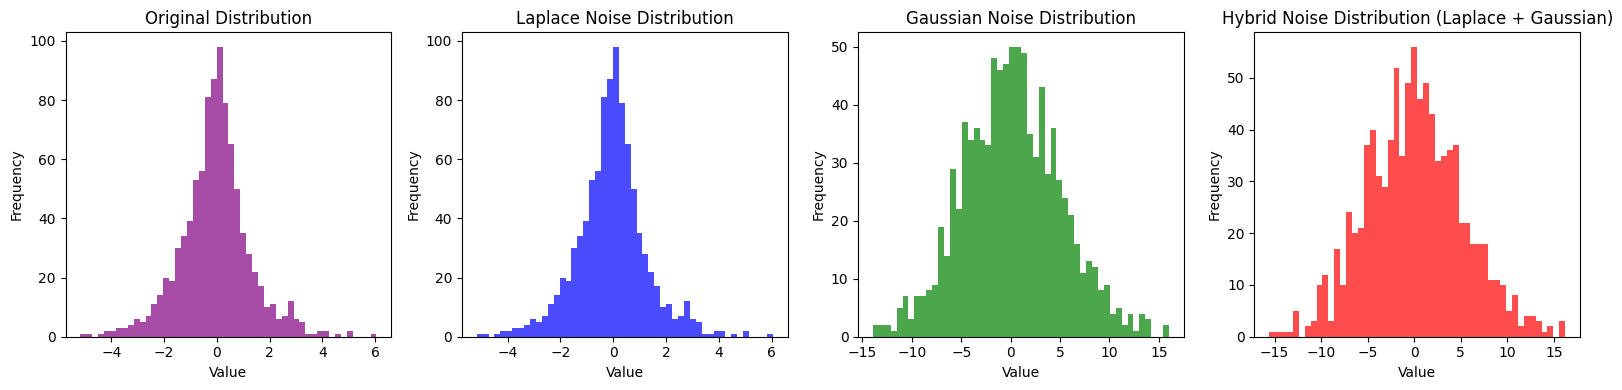

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define privacy parameters
privacy_budget = 1.0  # Adjust the overall privacy budget as needed
sensitivity = 1.0    
delta = 1e-5

# Define scales for Laplace and Gaussian noise separately
laplace_scale = sensitivity / privacy_budget 
gaussian_scale = np.sqrt(2 * np.log(1.25 / delta)) * laplace_scale

# Define the number of samples for the noise distributions
num_samples = len(data_f)

# Generate Laplace, Gaussian, and hybrid noise samples
laplace_noise = np.random.laplace(0, laplace_scale, num_samples)
gaussian_noise = np.random.normal(0, gaussian_scale, num_samples)
hybrid_noise = laplace_noise + gaussian_noise

# Calculate noisy data with the respective noise added
original_data = data_f['TotalSteps']
laplace_data = data_f['TotalSteps'] + laplace_noise
gaussian_data = data_f['TotalSteps'] + gaussian_noise
hybrid_data = data_f['TotalSteps'] + hybrid_noise

# Create histograms to visualize the distributions
plt.figure(figsize=(16, 4))

#Original Distribution
plt.subplot(141)
plt.hist(laplace_noise, bins=50, color='Purple', alpha=0.7)
plt.title('Original Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Laplace Noise Distribution
plt.subplot(142)
plt.hist(laplace_noise, bins=50, color='blue', alpha=0.7)
plt.title('Laplace Noise Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Gaussian Noise Distribution
plt.subplot(143)
plt.hist(gaussian_noise, bins=50, color='green', alpha=0.7)
plt.title('Gaussian Noise Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Hybrid Noise Distribution
plt.subplot(144)
plt.hist(hybrid_noise, bins=50, color='red', alpha=0.7)
plt.title('Hybrid Noise Distribution (Laplace + Gaussian)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

This query aims to determine the extent of utility loss for each noise model by comparing the performance metrics (mean squared error, mean absolute error, and coefficient of determination) of models trained with noisy data to those of the baseline model.

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to add noise
def add_noise(X, scale, noise_type="laplace"):
    if noise_type == "laplace":
        noise = np.random.laplace(0, scale, size=X.shape)
    elif noise_type == "gaussian":
        noise = np.random.normal(0, scale, size=X.shape)
    else:  # for hybrid noise
        laplace_noise = np.random.laplace(0, scale, size=X.shape)
        gaussian_noise = np.random.normal(0, scale, size=X.shape)
        noise = laplace_noise + gaussian_noise
    return X + noise

# Here is loading the data frame
X = data_f[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
y = data_f['Calories']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and calculate metrics
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

# Define privacy parameters
privacy_budget = 1.0
sensitivity = 1.0
delta = 1e-5

# Define scales for noise
laplace_scale = sensitivity / privacy_budget
gaussian_scale = np.sqrt(2 * np.log(1.25 / delta)) * (sensitivity / privacy_budget)


# Function to calculate utility loss
def utility_loss_calculate(baseline_metric, noisy_metric):
    return abs(baseline_metric - noisy_metric)

# Baseline model
baseline_mse, baseline_mae, baseline_r2 = train_and_evaluate(X_train, y_train, X_test, y_test)
print("Baseline Mean squared error (Without Noise):", baseline_mse)
print("Baseline Mean absolute error (Without Noise):", baseline_mae)
print("Baseline R-squared (Without Noise):", baseline_r2)
print("Utility Loss (Mean squared error) without Noise:", utility_loss_calculate(baseline_mse, baseline_mse))
print("Utility Loss (Mean Absolute error) without Noise:", utility_loss_calculate(baseline_mae, baseline_mae))
print("Utility Loss (R-squared) without Noise:", utility_loss_calculate(baseline_r2, baseline_r2))

# Laplace noise model
laplace_noisy_X_train = add_noise(X_train, laplace_scale, "laplace")
laplace_mse,laplace_mae,laplace_r2 = train_and_evaluate(laplace_noisy_X_train, y_train, X_test, y_test)
print("Mean squared error with Laplace Noise:", laplace_mse)
print("Mean Absolute error with Laplace Noise:", laplace_mae)
print("R-squared with Laplace Noise:", laplace_r2)
print("Utility Loss (Mean squared error) with Laplace Noise:", utility_loss_calculate(baseline_mse, laplace_mse))
print("Utility Loss (Mean Absolute error) with Laplace Noise:", utility_loss_calculate(baseline_mae, laplace_mae))
print("Utility Loss (R-squared) with Laplace Noise:", utility_loss_calculate(baseline_r2, laplace_r2))

# Gaussian noise model
gaussian_noisy_X_train = add_noise(X_train, gaussian_scale, "gaussian")
gaussian_mse,gaussian_mae, gaussian_r2 = train_and_evaluate(gaussian_noisy_X_train, y_train, X_test, y_test)
print("Mean squared error with Gaussian Noise:", gaussian_mse)
print("Mean Absolute error with Gaussian Noise:", gaussian_mae)
print("R-squared with Gaussian Noise:", gaussian_r2)
print("Utility Loss (Mean squared error) with Gaussian Noise:", utility_loss_calculate(baseline_mse, gaussian_mse))
print("Utility Loss (Mean Absolute error) with Gaussian Noise:", utility_loss_calculate(baseline_mae, gaussian_mae))
print("Utility Loss (R-squared) with Gaussian Noise:", utility_loss_calculate(baseline_r2, gaussian_r2))

# Hybrid noise model
hybrid_noisy_X_train = add_noise(X_train, laplace_scale, "hybrid") 
hybrid_mse,hybrid_mae, hybrid_r2 = train_and_evaluate(hybrid_noisy_X_train, y_train, X_test, y_test)
print("Mean squared error with Hybrid Noise:", hybrid_mse)
print("Mean Absolute error with Hybrid Noise:", hybrid_mae)
print("R-squared with Hybrid Noise:", hybrid_r2)
print("Utility Loss (Mean squared error) with Hybrid Noise:", utility_loss_calculate(baseline_mse, hybrid_mse))
print("Utility Loss (Mean Absolute error) with Hybrid Noise:", utility_loss_calculate(baseline_mae, hybrid_mae))
print("Utility Loss (R-squared) with Hybrid Noise:", utility_loss_calculate(baseline_r2, hybrid_r2))


Baseline Mean squared error (Without Noise): 206943.86508589674
Baseline Mean absolute error (Without Noise): 373.15583770848303
Baseline R-squared (Without Noise): 0.5621847582094393
Utility Loss (Mean squared error) without Noise: 0.0
Utility Loss (Mean Absolute error) without Noise: 0.0
Utility Loss (R-squared) without Noise: 0.0
Mean squared error with Laplace Noise: 251661.10550546832
Mean Absolute error with Laplace Noise: 424.13873451539706
R-squared with Laplace Noise: 0.46757992699893147
Utility Loss (Mean squared error) with Laplace Noise: 44717.24041957158
Utility Loss (Mean Absolute error) with Laplace Noise: 50.98289680691403
Utility Loss (R-squared) with Laplace Noise: 0.09460483121050778
Mean squared error with Gaussian Noise: 266451.43568394677
Mean Absolute error with Gaussian Noise: 438.7855757548219
R-squared with Gaussian Noise: 0.4362891613578965
Utility Loss (Mean squared error) with Gaussian Noise: 59507.57059805002
Utility Loss (Mean Absolute error) with Gaussia

This code will generate line plots showing the trade-off between different budget privacy and the accuracy (measured by Mean squared error, Mean absolute error, and R squared) for the noise model to detect the impact of privacy on model performance.

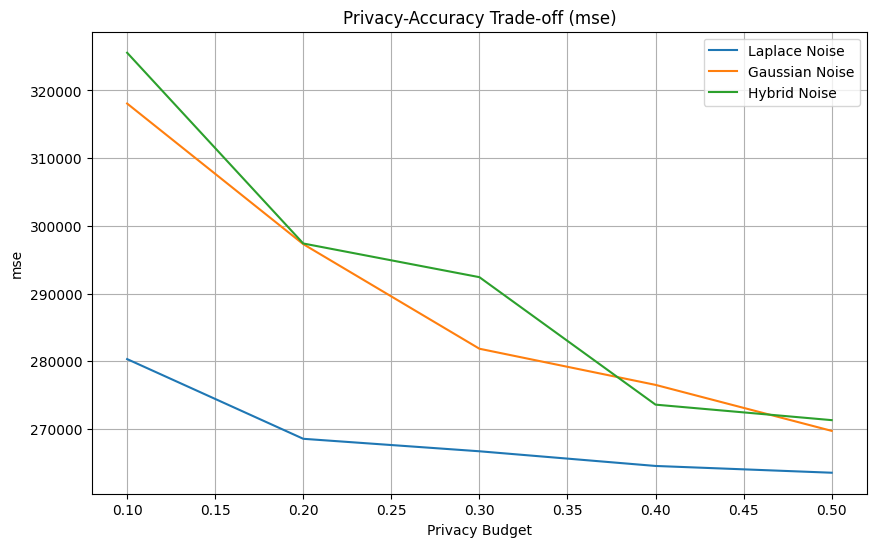

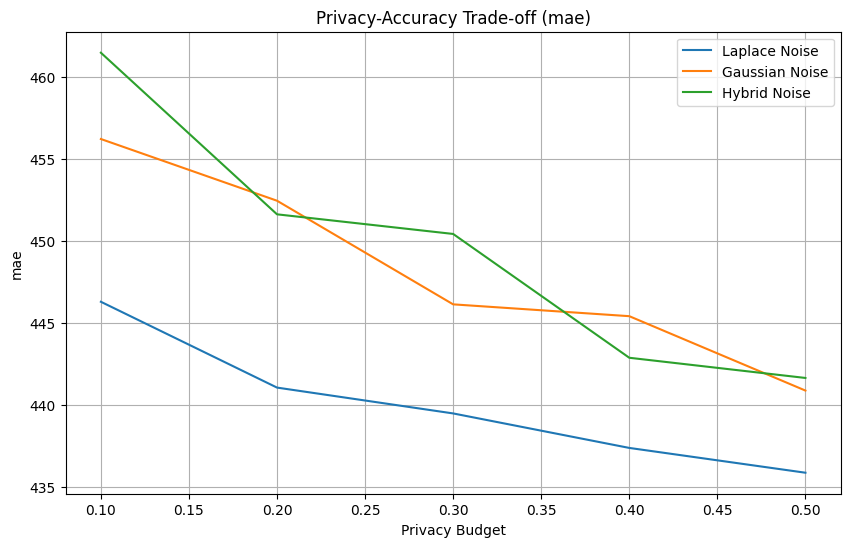

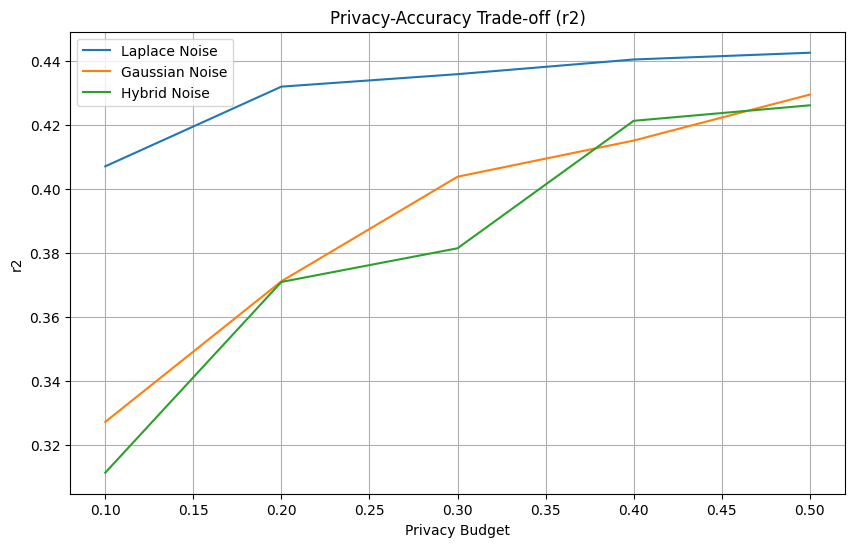

In [38]:
#### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Define function to calculate the scale for Laplace or Gaussian noise or Hybrid
def cal_noise_scale(privacy_budget, sensitivity, noise_type="laplace", delta=None):
    if noise_type == "laplace":
        return sensitivity / privacy_budget
    elif noise_type == "gaussian":
        return np.sqrt(2 * np.log(1.25 / delta)) * (sensitivity / privacy_budget)
    elif noise_type == "hybrid":
        # For hybrid, calculate both scales and handle their combination in add_noise function
        laplace_scale = sensitivity / privacy_budget
        gaussian_scale = np.sqrt(2 * np.log(1.25 / delta)) * (sensitivity / privacy_budget)
        return laplace_scale, gaussian_scale

# Function to add noise to the data
def add_noise(data, scale, noise_type):
    if noise_type == "laplace":
        noise = np.random.laplace(0, scale, data.shape)
    elif noise_type == "gaussian":
        noise = np.random.normal(0, scale, data.shape)
    elif noise_type == "hybrid":
        laplace_scale, gaussian_scale = scale
        noise = np.random.laplace(0, laplace_scale, data.shape) + np.random.normal(0, gaussian_scale, data.shape)
    else:
        raise ValueError("Invalid noise type specified. Choose 'laplace', 'gaussian', or 'hybrid'.")
    return data + noise

# Define features (X) and target (y)
X = data_f[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
y = data_f['Calories']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and calculate metrics
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

# Baseline model for comparison
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

# Define a range of privacy budgets
privacy_budgets = np.linspace(0.1,0.5, 5)  # Adjust as needed

# Initialize results dictionary
results = {"Laplace": {"privacy_budget": [], "mse": [] ,"mae": [], "r2": []},
           "Gaussian": {"privacy_budget": [], "mse": [] ,"mae": [], "r2": []},
           "Hybrid": {"privacy_budget": [], "mse": [] ,"mae": [], "r2": []}}

# Sensitivity and delta for the differential privacy calculations
sensitivity = 1 
delta = 1e-5  

# Iterate over each privacy budget and noise type
for budget in privacy_budgets:
    for noise_type in ["Laplace", "Gaussian", "Hybrid"]:
        scale = cal_noise_scale(budget, sensitivity, noise_type.lower(), delta)
        noisy_X_train = add_noise(X_train, scale, noise_type.lower())
        mse, mae, r2 = train_and_evaluate(noisy_X_train, y_train, X_test, y_test)
        
        # Store results
        results[noise_type]["privacy_budget"].append(budget)
        results[noise_type]["mse"].append(mse)
        results[noise_type]["mae"].append(mae)
        results[noise_type]["r2"].append(r2)

# Function to plot the privacy-accuracy trade-off
def plot_privacy_accuracy_tradeoff(results, metric):
    plt.figure(figsize=(10, 6))
    for noise_type in results:
        plt.plot(results[noise_type]["privacy_budget"], results[noise_type][metric], label=f'{noise_type} Noise')
    
    plt.xlabel('Privacy Budget')
    plt.ylabel(metric)
    plt.title(f'Privacy-Accuracy Trade-off ({metric})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results for MSE,MAE and R-squared
plot_privacy_accuracy_tradeoff(results, 'mse')
plot_privacy_accuracy_tradeoff(results, 'mae')
plot_privacy_accuracy_tradeoff(results, 'r2')
